In [1]:
import numpy as np 
import pandas as pd 
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import randint

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_score, cross_val_predict

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import classification_report, make_scorer
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix


from sklearn.preprocessing import StandardScaler

In [2]:
train_df= pd.read_csv("train_after_EDA.csv")
test_df= pd.read_csv("test_after_EDA.csv")

In [3]:
print(train_df.shape)
print(test_df.shape)


(11903, 118)
(2976, 118)


In [4]:
train_df.head()

,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,FLAG_LX,FLAG_AUTO,FLAG_APPAREL,FLAG_DEAL,FLAG_RECREA,FLAG_ENTERTAINMENT,FLAG_GIFT_CARD,FLAG_FASTFOOD,FLAG_GAS,FLAG_HIGH_AMT,FLAG_HIGH_RECREA,FLAG_INTERNET,FLAG_INTERNATIONAL,FLAG_FASHION,FLAG_LOW_AMT,FLAG_MANUAL_ENTRY,FLAG_ELCTRNCS,FLAG_SWIPE,FLAG_HEALTH,MEAN_AUTO_PAST_7DAY,MEAN_APPAREL_PAST_7DAY,MEAN_RECREA_PAST_7DAY,MEAN_GIFT_CARD_PAST_7DAY,MEAN_FASTFOOD_PAST_7DAY,MEAN_HIGH_AMT_PAST_7DAY,MEAN_INTERNATIONAL_PAST_7DAY,MEAN_FASHION_PAST_7DAY,MEAN_LOW_AMT_PAST_7DAY,MEAN_MANUAL_ENTRY_PAST_7DAY,MEAN_ELCTRNCS_PAST_7DAY,MEAN_SWIPE_PAST_7DAY,MEAN_WEEKEND_PAST_7DAY,MAX_RECREA_PAST_7DAY,MAX_HIGH_RECREA_PAST_7DAY,STD_LX_PAST_7DAY,STD_FASTFOOD_PAST_7DAY,STD_HIGH_AMT_PAST_7DAY,STD_INTERNET_PAST_7DAY,STD_LOW_AMT_PAST_7DAY,STD_SWIPE_PAST_7DAY,STD_HEALTH_PAST_7DAY,SUM_LX_PAST_7DAY,SUM_RECREA_PAST_7DAY,SUM_LOW_AMT_PAST_7DAY,SUM_PARTIAL_PAST_7DAY,SUM_SWIPE_PAST_7DAY,SUM_WEEKEND_PAST_7DAY,COUNT_AUTO_PAST_7DAY,COUNT_ENTERTAINMENT_PAST_7DAY,COUNT_INTERNET_PAST_7DAY,COUNT_MANUAL_ENTRY_PAST_7DAY,COUNT_WEEKEND_PAST_7DAY,MEAN_AUTO_PAST_30DAY,MEAN_DEAL_PAST_30DAY,MEAN_RECREA_PAST_30DAY,MEAN_ENTERTAINMENT_PAST_30DAY,MEAN_GIFT_CARD_PAST_30DAY,MEAN_HIGH_AMT_PAST_30DAY,MEAN_LOW_AMT_PAST_30DAY,MEAN_MANUAL_ENTRY_PAST_30DAY,MEAN_ELCTRNCS_PAST_30DAY,MEAN_WEEKEND_PAST_30DAY,MAX_FASTFOOD_PAST_30DAY,MAX_PARTIAL_PAST_30DAY,STD_AUTO_PAST_30DAY,STD_APPAREL_PAST_30DAY,STD_RECREA_PAST_30DAY,STD_ENTERTAINMENT_PAST_30DAY,STD_GIFT_CARD_PAST_30DAY,STD_HIGH_RECREA_PAST_30DAY,STD_INTERNET_PAST_30DAY,STD_LOW_AMT_PAST_30DAY,STD_PARTIAL_PAST_30DAY,SUM_AUTO_PAST_30DAY,SUM_DEAL_PAST_30DAY,SUM_RECREA_PAST_30DAY,SUM_GIFT_CARD_PAST_30DAY,SUM_FASTFOOD_PAST_30DAY,SUM_HIGH_RECREA_PAST_30DAY,SUM_INTERNET_PAST_30DAY,SUM_LOW_AMT_PAST_30DAY,SUM_MANUAL_ENTRY_PAST_30DAY,SUM_WEEKEND_PAST_30DAY,COUNT_RECREA_PAST_30DAY,COUNT_GIFT_CARD_PAST_30DAY,COUNT_FASTFOOD_PAST_30DAY,COUNT_ELCTRNCS_PAST_30DAY,COUNT_WEEKEND_PAST_30DAY,auto_mean_ratio,auto_sum_ratio,deal_mean30_sum30_ratio,gift_card_mean7_mean30_ratio,gas_sum7_count7_ratio,gas_sum30_count30_ratio,high_amt_sum30_count30_ratio,recrea_mean30_count_30_ratio,swipe_sum30_count30_ratio,health_mean7_count_7_ratio,health_mean30_count_30_ratio,day_of_week_categorized,hour_of_day_categorized_0,hour_of_day_categorized_1,hour_of_day_categorized_2,add-shipping-address,add-payment-method,payment-failed,update-shipping-address,update-payment-method,forgot-password,OS_FAMILY_categorized_0,OS_FAMILY_categorized_1,OS_FAMILY_categorized_2,OS_FAMILY_categorized_3,TIME_SPENT_log_transformed,city_categorical
0,1.0,7420.73,69.70,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,341.25,358.75,0.0,358.75,0.0,0.0,0.00,358.75,0.00,15.60,0.00,358.75,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,358.75,0.00,0.0,15.60,0.00,0,0,1,0,0,0.00,0.00,358.75,0.0,341.25,341.25,0.00,341.25,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,341.25,358.75,0.0,0.00,27.68,0.00,341.25,0.0,1,0,0,0,0,0.0,0.0,0.000000,1.051282,0.00,0.00,0.00,358.75,15.60,0.0,0.00,0,0,1,0,1,0,0,0,0,0,1,0,0,0,5.973810,1
1,0.0,3825.90,1.02,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,1.02,18.52,0.00,12.35,9.91,0.00,0.0,0.0,0.0,0.0,0.00,0.0,5.81,0.0,0.0,0.00,0.97,0.0,77.90,28.27,0,0,0,0,3,0.00,34.71,31.67,0.0,0.00,0.00,0.97,18.52,28.70,16.20,0.0,0.0,0.0,11.47,23.88,0.0,0.00,9.47,47.11,0.00,0.0,0.00,173.55,316.73,0.00,0.0,62.40,116.03,10.25,19.48,210.6,9,0,0,0,13,0.0,0.0,0.200000,0.000000,0.97,97.50,0.00,285.03,20202.60,0.0,0.00,0,1,0,0,0,0,0,0,0,0,1,0,0,0,6.911747,1
2,0.0,115.83,33.15,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,1,0,7.141245,1
3,0.0,28114.72,514.55,0,0,0,0,0,0,0,0,0

In [5]:
train_df.columns


Index(['FRAUD_FLAG', 'AVAIL_CRDT', 'AMOUNT', 'FLAG_LX', 'FLAG_AUTO',
       'FLAG_APPAREL', 'FLAG_DEAL', 'FLAG_RECREA', 'FLAG_ENTERTAINMENT',
       'FLAG_GIFT_CARD',
       ...
       'payment-failed', 'update-shipping-address', 'update-payment-method',
       'forgot-password', 'OS_FAMILY_categorized_0', 'OS_FAMILY_categorized_1',
       'OS_FAMILY_categorized_2', 'OS_FAMILY_categorized_3',
       'TIME_SPENT_log_transformed', 'city_categorical'],
      dtype='object', length=118)

In [6]:
train_df = train_df.drop(["MEAN_AUTO_PAST_7DAY",
"MEAN_APPAREL_PAST_7DAY",
"MEAN_RECREA_PAST_7DAY",
"MEAN_GIFT_CARD_PAST_7DAY",
"MEAN_FASTFOOD_PAST_7DAY",
"MEAN_HIGH_AMT_PAST_7DAY",
"MEAN_INTERNATIONAL_PAST_7DAY",
"MEAN_FASHION_PAST_7DAY",
"MEAN_LOW_AMT_PAST_7DAY",
"MEAN_MANUAL_ENTRY_PAST_7DAY",
"MEAN_ELCTRNCS_PAST_7DAY",
"MEAN_SWIPE_PAST_7DAY",
"MEAN_WEEKEND_PAST_7DAY",
"MAX_RECREA_PAST_7DAY",
"MAX_HIGH_RECREA_PAST_7DAY",
"STD_LX_PAST_7DAY",
"STD_FASTFOOD_PAST_7DAY",
"STD_HIGH_AMT_PAST_7DAY",
"STD_INTERNET_PAST_7DAY",
"STD_LOW_AMT_PAST_7DAY",
"STD_SWIPE_PAST_7DAY",
"STD_HEALTH_PAST_7DAY",
"SUM_LX_PAST_7DAY",
"SUM_RECREA_PAST_7DAY",
"SUM_LOW_AMT_PAST_7DAY",
"SUM_PARTIAL_PAST_7DAY",
"SUM_SWIPE_PAST_7DAY",
"SUM_WEEKEND_PAST_7DAY",
"COUNT_AUTO_PAST_7DAY",
"COUNT_ENTERTAINMENT_PAST_7DAY",
"COUNT_INTERNET_PAST_7DAY",
"COUNT_MANUAL_ENTRY_PAST_7DAY",
"COUNT_WEEKEND_PAST_7DAY",
"MEAN_AUTO_PAST_30DAY",
"MEAN_DEAL_PAST_30DAY",
"MEAN_RECREA_PAST_30DAY",
"MEAN_ENTERTAINMENT_PAST_30DAY",
"MEAN_GIFT_CARD_PAST_30DAY",
"MEAN_HIGH_AMT_PAST_30DAY",
"MEAN_LOW_AMT_PAST_30DAY",
"MEAN_MANUAL_ENTRY_PAST_30DAY",
"MEAN_ELCTRNCS_PAST_30DAY",
"MEAN_WEEKEND_PAST_30DAY",
"MAX_FASTFOOD_PAST_30DAY",
"MAX_PARTIAL_PAST_30DAY",
"STD_AUTO_PAST_30DAY",
"STD_APPAREL_PAST_30DAY",
"STD_RECREA_PAST_30DAY",
"STD_ENTERTAINMENT_PAST_30DAY",
"STD_GIFT_CARD_PAST_30DAY",
"STD_HIGH_RECREA_PAST_30DAY",
"STD_INTERNET_PAST_30DAY",
"STD_LOW_AMT_PAST_30DAY",
"STD_PARTIAL_PAST_30DAY",
"SUM_AUTO_PAST_30DAY",
"SUM_DEAL_PAST_30DAY",
"SUM_RECREA_PAST_30DAY",
"SUM_GIFT_CARD_PAST_30DAY",
"SUM_FASTFOOD_PAST_30DAY",
"SUM_HIGH_RECREA_PAST_30DAY",
"SUM_INTERNET_PAST_30DAY",
"SUM_LOW_AMT_PAST_30DAY",
"SUM_MANUAL_ENTRY_PAST_30DAY",
"SUM_WEEKEND_PAST_30DAY",
"COUNT_RECREA_PAST_30DAY",
"COUNT_GIFT_CARD_PAST_30DAY",
"COUNT_FASTFOOD_PAST_30DAY",
"COUNT_ELCTRNCS_PAST_30DAY",
"COUNT_WEEKEND_PAST_30DAY",
"auto_mean_ratio",
"auto_sum_ratio",
"deal_mean30_sum30_ratio",
"gift_card_mean7_mean30_ratio",
"gas_sum7_count7_ratio",
"gas_sum30_count30_ratio",
"high_amt_sum30_count30_ratio",
"recrea_mean30_count_30_ratio",
"swipe_sum30_count30_ratio",
"health_mean7_count_7_ratio",
"health_mean30_count_30_ratio"
], axis=1)

In [7]:
train_df.columns

Index(['FRAUD_FLAG', 'AVAIL_CRDT', 'AMOUNT', 'FLAG_LX', 'FLAG_AUTO',
       'FLAG_APPAREL', 'FLAG_DEAL', 'FLAG_RECREA', 'FLAG_ENTERTAINMENT',
       'FLAG_GIFT_CARD', 'FLAG_FASTFOOD', 'FLAG_GAS', 'FLAG_HIGH_AMT',
       'FLAG_HIGH_RECREA', 'FLAG_INTERNET', 'FLAG_INTERNATIONAL',
       'FLAG_FASHION', 'FLAG_LOW_AMT', 'FLAG_MANUAL_ENTRY', 'FLAG_ELCTRNCS',
       'FLAG_SWIPE', 'FLAG_HEALTH', 'day_of_week_categorized',
       'hour_of_day_categorized_0', 'hour_of_day_categorized_1',
       'hour_of_day_categorized_2', 'add-shipping-address',
       'add-payment-method', 'payment-failed', 'update-shipping-address',
       'update-payment-method', 'forgot-password', 'OS_FAMILY_categorized_0',
       'OS_FAMILY_categorized_1', 'OS_FAMILY_categorized_2',
       'OS_FAMILY_categorized_3', 'TIME_SPENT_log_transformed',
       'city_categorical'],
      dtype='object')

In [8]:
train_df.head()

,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,FLAG_LX,FLAG_AUTO,FLAG_APPAREL,FLAG_DEAL,FLAG_RECREA,FLAG_ENTERTAINMENT,FLAG_GIFT_CARD,FLAG_FASTFOOD,FLAG_GAS,FLAG_HIGH_AMT,FLAG_HIGH_RECREA,FLAG_INTERNET,FLAG_INTERNATIONAL,FLAG_FASHION,FLAG_LOW_AMT,FLAG_MANUAL_ENTRY,FLAG_ELCTRNCS,FLAG_SWIPE,FLAG_HEALTH,day_of_week_categorized,hour_of_day_categorized_0,hour_of_day_categorized_1,hour_of_day_categorized_2,add-shipping-address,add-payment-method,payment-failed,update-shipping-address,update-payment-method,forgot-password,OS_FAMILY_categorized_0,OS_FAMILY_categorized_1,OS_FAMILY_categorized_2,OS_FAMILY_categorized_3,TIME_SPENT_log_transformed,city_categorical
0,1.0,7420.73,69.70,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,5.973810,1
1,0.0,3825.90,1.02,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,6.911747,1
2,0.0,115.83,33.15,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,7.141245,1
3,0.0,28114.72,514.55,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,6.862758,1
4,0.0,145.28,187.57,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,7.050989,0


In [9]:
train_df = train_df.drop(['OS_FAMILY_categorized_0', 'OS_FAMILY_categorized_1',
       'OS_FAMILY_categorized_2', 'OS_FAMILY_categorized_3'], axis=1)

In [10]:
train_df.head()

,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,FLAG_LX,FLAG_AUTO,FLAG_APPAREL,FLAG_DEAL,FLAG_RECREA,FLAG_ENTERTAINMENT,FLAG_GIFT_CARD,FLAG_FASTFOOD,FLAG_GAS,FLAG_HIGH_AMT,FLAG_HIGH_RECREA,FLAG_INTERNET,FLAG_INTERNATIONAL,FLAG_FASHION,FLAG_LOW_AMT,FLAG_MANUAL_ENTRY,FLAG_ELCTRNCS,FLAG_SWIPE,FLAG_HEALTH,day_of_week_categorized,hour_of_day_categorized_0,hour_of_day_categorized_1,hour_of_day_categorized_2,add-shipping-address,add-payment-method,payment-failed,update-shipping-address,update-payment-method,forgot-password,TIME_SPENT_log_transformed,city_categorical
0,1.0,7420.73,69.70,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5.973810,1
1,0.0,3825.90,1.02,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6.911747,1
2,0.0,115.83,33.15,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7.141245,1
3,0.0,28114.72,514.55,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,6.862758,1
4,0.0,145.28,187.57,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,7.050989,0


In [11]:
train_df.columns

Index(['FRAUD_FLAG', 'AVAIL_CRDT', 'AMOUNT', 'FLAG_LX', 'FLAG_AUTO',
       'FLAG_APPAREL', 'FLAG_DEAL', 'FLAG_RECREA', 'FLAG_ENTERTAINMENT',
       'FLAG_GIFT_CARD', 'FLAG_FASTFOOD', 'FLAG_GAS', 'FLAG_HIGH_AMT',
       'FLAG_HIGH_RECREA', 'FLAG_INTERNET', 'FLAG_INTERNATIONAL',
       'FLAG_FASHION', 'FLAG_LOW_AMT', 'FLAG_MANUAL_ENTRY', 'FLAG_ELCTRNCS',
       'FLAG_SWIPE', 'FLAG_HEALTH', 'day_of_week_categorized',
       'hour_of_day_categorized_0', 'hour_of_day_categorized_1',
       'hour_of_day_categorized_2', 'add-shipping-address',
       'add-payment-method', 'payment-failed', 'update-shipping-address',
       'update-payment-method', 'forgot-password',
       'TIME_SPENT_log_transformed', 'city_categorical'],
      dtype='object')

In [12]:
train_df[['add-shipping-address',
       'add-payment-method', 'payment-failed', 'update-shipping-address',
       'update-payment-method']]

,add-shipping-address,add-payment-method,payment-failed,update-shipping-address,update-payment-method
0,1,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
11898,1,0,0,0,0
11899,0,0,0,0,0
11900,0,0,0,0,1
11901,0,0,0,0,0


In [13]:
train_df = train_df.drop(['add-payment-method', 'add-shipping-address', 'update-shipping-address',
       'update-payment-method'], axis=1)

In [14]:
train_df.columns

Index(['FRAUD_FLAG', 'AVAIL_CRDT', 'AMOUNT', 'FLAG_LX', 'FLAG_AUTO',
       'FLAG_APPAREL', 'FLAG_DEAL', 'FLAG_RECREA', 'FLAG_ENTERTAINMENT',
       'FLAG_GIFT_CARD', 'FLAG_FASTFOOD', 'FLAG_GAS', 'FLAG_HIGH_AMT',
       'FLAG_HIGH_RECREA', 'FLAG_INTERNET', 'FLAG_INTERNATIONAL',
       'FLAG_FASHION', 'FLAG_LOW_AMT', 'FLAG_MANUAL_ENTRY', 'FLAG_ELCTRNCS',
       'FLAG_SWIPE', 'FLAG_HEALTH', 'day_of_week_categorized',
       'hour_of_day_categorized_0', 'hour_of_day_categorized_1',
       'hour_of_day_categorized_2', 'payment-failed', 'forgot-password',
       'TIME_SPENT_log_transformed', 'city_categorical'],
      dtype='object')

In [15]:
train_df.head()

,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,FLAG_LX,FLAG_AUTO,FLAG_APPAREL,FLAG_DEAL,FLAG_RECREA,FLAG_ENTERTAINMENT,FLAG_GIFT_CARD,FLAG_FASTFOOD,FLAG_GAS,FLAG_HIGH_AMT,FLAG_HIGH_RECREA,FLAG_INTERNET,FLAG_INTERNATIONAL,FLAG_FASHION,FLAG_LOW_AMT,FLAG_MANUAL_ENTRY,FLAG_ELCTRNCS,FLAG_SWIPE,FLAG_HEALTH,day_of_week_categorized,hour_of_day_categorized_0,hour_of_day_categorized_1,hour_of_day_categorized_2,payment-failed,forgot-password,TIME_SPENT_log_transformed,city_categorical
0,1.0,7420.73,69.70,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,5.973810,1
1,0.0,3825.90,1.02,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,6.911747,1
2,0.0,115.83,33.15,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,7.141245,1
3,0.0,28114.72,514.55,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,6.862758,1
4,0.0,145.28,187.57,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,7.050989,0


In [16]:
train_df['KYC'] = np.zeros(11903)

In [17]:
train_df.head()

,FRAUD_FLAG,AVAIL_CRDT,AMOUNT,FLAG_LX,FLAG_AUTO,FLAG_APPAREL,FLAG_DEAL,FLAG_RECREA,FLAG_ENTERTAINMENT,FLAG_GIFT_CARD,FLAG_FASTFOOD,FLAG_GAS,FLAG_HIGH_AMT,FLAG_HIGH_RECREA,FLAG_INTERNET,FLAG_INTERNATIONAL,FLAG_FASHION,FLAG_LOW_AMT,FLAG_MANUAL_ENTRY,FLAG_ELCTRNCS,FLAG_SWIPE,FLAG_HEALTH,day_of_week_categorized,hour_of_day_categorized_0,hour_of_day_categorized_1,hour_of_day_categorized_2,payment-failed,forgot-password,TIME_SPENT_log_transformed,city_categorical,KYC
0,1.0,7420.73,69.70,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,5.973810,1,0.0
1,0.0,3825.90,1.02,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,6.911747,1,0.0
2,0.0,115.83,33.15,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,7.141245,1,0.0
3,0.0,28114.72,514.55,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,6.862758,1,0.0
4,0.0,145.28,187.57,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,7.050989,0,0.0


In [18]:
train_df.loc[train_df['FRAUD_FLAG'] == 1, 'KYC'] = np.random.choice([0, 1], p=[0.2, 0.8], size=train_df[train_df['FRAUD_FLAG'] == 1].shape[0])

In [19]:
train_df.loc[train_df['FRAUD_FLAG'] == 0, 'KYC'] = np.random.choice([0, 1], p=[0.9, 0.1], size=train_df[train_df['FRAUD_FLAG'] == 0].shape[0])

In [20]:
train_df['KYC'].value_counts()

KYC
0.0    10084
1.0     1819
Name: count, dtype: int64

In [21]:
train_df['multiple_accounts'] = np.zeros(11903)

In [22]:
train_df.loc[train_df['FRAUD_FLAG'] == 1, 'multiple_accounts'] = np.random.choice([0, 1], p=[0.2, 0.8], size=train_df[train_df['FRAUD_FLAG'] == 1].shape[0])

In [23]:
train_df.loc[train_df['FRAUD_FLAG'] == 0, 'multiple_accounts'] = np.random.choice([0, 1], p=[0.9, 0.1], size=train_df[train_df['FRAUD_FLAG'] == 0].shape[0])

In [24]:
train_df['multiple_accounts'].value_counts()

multiple_accounts
0.0    10093
1.0     1810
Name: count, dtype: int64

In [25]:
train_df =train_df.drop(['TIME_SPENT_log_transformed','city_categorical'], axis=1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = train_df.drop("FRAUD_FLAG", axis=1)
y = train_df["FRAUD_FLAG"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [28]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import randint
from sklearn.metrics import classification_report, make_scorer

In [29]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

FRAUD_FLAG
0.0    7689
1.0    7689
Name: count, dtype: int64

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_score, cross_val_predict

In [31]:
RF_3_3 = RandomForestClassifier()

param_grid = {
    "n_estimators": [400, 500],
    "max_depth": randint(low=10, high=20),
    "min_samples_split": randint(low=2, high=20),
    "min_samples_leaf": randint(low=4, high=10),
    "max_features": ["log2", "sqrt"],
}
random_search = RandomizedSearchCV(
    estimator = RF_3_3, 
    param_distributions = param_grid, 
    n_iter = 20,
    scoring = make_scorer(f1_score),
    cv = 5,
    random_state = 42
)
random_search.fit(X_train_resampled, y_train_resampled)

best_model_RF_3_3 = random_search.best_estimator_
best_params_RF_3_3 = random_search.best_params_

cross_val_score_RF_3_3 = cross_val_score(best_model_RF_3_3, X_train_resampled, y_train_resampled, cv=5)

y_train_pred_RF_3_3 = cross_val_predict(best_model_RF_3_3, X_train_resampled, y_train_resampled, cv=5)
y_train_pred_proba_RF_3_3 = cross_val_predict(best_model_RF_3_3, X_train_resampled, y_train_resampled, cv=5, method="predict_proba")[:, 1]

In [32]:
importance_RF_3_3 = best_model_RF_3_3.feature_importances_

f1 score: 0.9740542681719152

conf_matrix:
[[7608   81]
 [ 312 7377]]

precision score: 0.9891391794046661

recall score: 0.9594225516972298

auc_roc: 0.9953011398490894


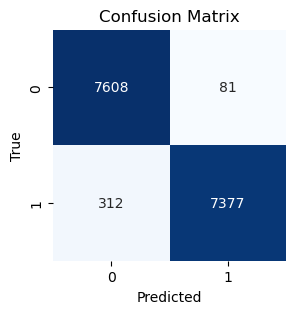

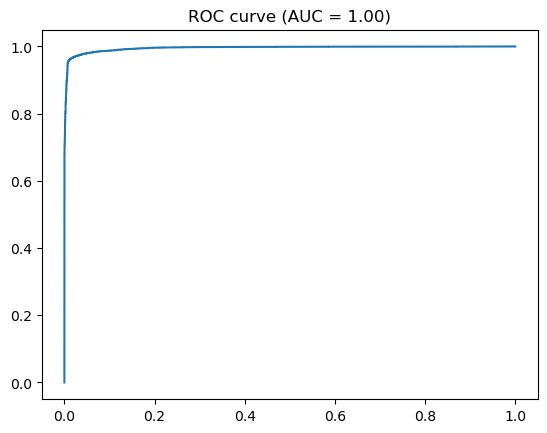

In [33]:
f1 = f1_score(y_train_resampled, y_train_pred_RF_3_3)
conf_matrix = confusion_matrix(y_train_resampled, y_train_pred_RF_3_3)
precision = precision_score(y_train_resampled, y_train_pred_RF_3_3)
recall = recall_score(y_train_resampled, y_train_pred_RF_3_3)
auc_roc = roc_auc_score(y_train_resampled, y_train_pred_proba_RF_3_3)

print("f1 score:", f1)
print()
print("conf_matrix:")
print(conf_matrix)
print()
print("precision score:", precision)
print()
print("recall score:", recall)
print()
print("auc_roc:", auc_roc)

tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")
plt.show()

fpr, tpr, thresholds = roc_curve(y_train_resampled, y_train_pred_proba_RF_3_3)
plt.plot(fpr, tpr)
plt.title("ROC curve (AUC = {:.2f})".format(auc_roc))
plt.show()


y_test_pred_RF_3_3 = best_model_RF_3_3.predict(X_test)
y_test_pred_proba_RF_3_3 = best_model_RF_3_3.predict_proba(X_test)[:,1]


print()

f1 score: 0.745417515274949

conf_matrix:
[[3263   33]
 [  92  183]]

precision score: 0.8472222222222222

recall score: 0.6654545454545454

auc_roc: 0.9681652691968226


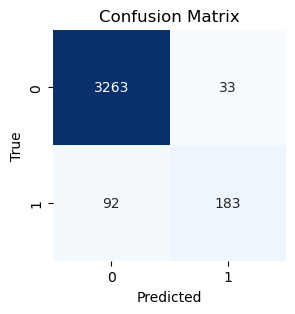

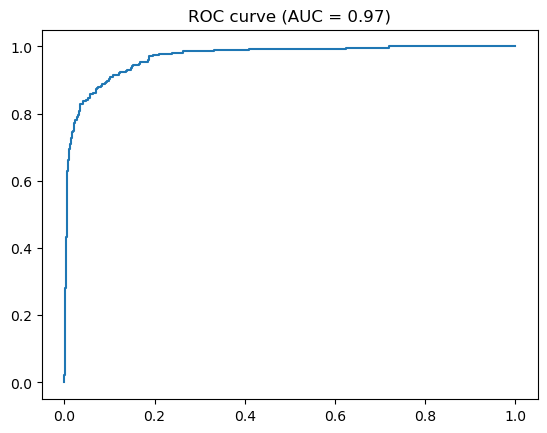

In [34]:
f1 = f1_score(y_test, y_test_pred_RF_3_3)
auc_roc = roc_auc_score(y_test, y_test_pred_proba_RF_3_3)
conf_matrix = confusion_matrix(y_test, y_test_pred_RF_3_3)
precision = precision_score(y_test, y_test_pred_RF_3_3)
recall = recall_score(y_test, y_test_pred_RF_3_3)

print("f1 score:", f1)
print()
print("conf_matrix:")
print(conf_matrix)
print()
print("precision score:", precision)
print()
print("recall score:", recall)
print()
print("auc_roc:", auc_roc)

tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
ax.set_xlabel("Predicted") 
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba_RF_3_3)
plt.plot(fpr, tpr)
plt.title("ROC curve (AUC = {:.2f})".format(auc_roc))
plt.show()

In [35]:
feature_importance_df = pd.DataFrame({"Feature": X_train_resampled.columns, 
                                      "Importance %": importance_RF_3_3 *100}).sort_values(by="Importance %", ascending=False)

RF_important_features = list(feature_importance_df[feature_importance_df["Importance %"] > 2]["Feature"])
print(RF_important_features)

X_train_selected_RF = X_train_resampled[RF_important_features]
X_test_selected_RF = X_test[RF_important_features]

print(X_train_selected_RF.shape)
print()
print(X_test_selected_RF.shape)
print()

['KYC', 'multiple_accounts', 'hour_of_day_categorized_2', 'hour_of_day_categorized_1', 'FLAG_LOW_AMT', 'AMOUNT']
(15378, 6)

(3571, 6)



In [36]:
import joblib


In [37]:
joblib.dump(best_model_RF_3_3, 'final_model.pkl')

['final_model.pkl']

In [38]:
joblib.dump(list(X.columns), 'col_names.pkl')

['col_names.pkl']